In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import preproccessing as prep


In [4]:
acwi = pd.read_csv('acwi_25.08.23.csv')
acwi.index = pd.DatetimeIndex(acwi['Date'])
acwi = acwi['MSCI ACWI']

In [5]:
acwi.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 428 entries, 1987-12-01 to 2023-07-01
Series name: MSCI ACWI
Non-Null Count  Dtype  
--------------  -----  
428 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


In [16]:
acwi_returns = prep.log_returns(acwi,freg='m')
acwi_returns.describe()

count    427.000000
mean       0.006811
std        0.043055
min       -0.155028
25%       -0.013693
50%        0.011286
75%        0.034876
max        0.114884
Name: MSCI ACWI, dtype: float64

In [31]:
acwi_returns['1994-01-01':'2019-12-01'].mean() * 12


0.07367958971851214

In [32]:
acwi_returns['1994-01-01':'2019-07'].std() * np.sqrt(12)

0.1455001835139945

<AxesSubplot:xlabel='Date'>

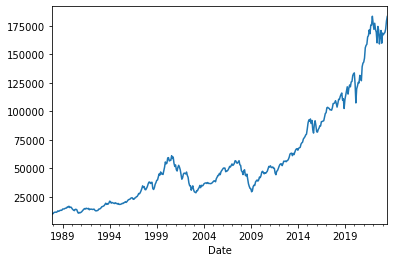

In [33]:
acwi.plot()

<AxesSubplot:xlabel='Date'>

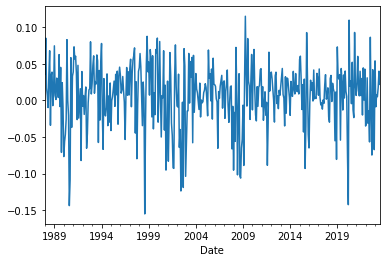

In [34]:
acwi_returns.plot()

In [12]:
model = sm.tsa.MarkovRegression(
    acwi_returns['1990-01-01':'2019-07'],
    k_regimes=2,
    switching_variance=True
    )

result = model.fit()

c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              MSCI ACWI   No. Observations:                  355
Model:               MarkovRegression   Log Likelihood                 644.979
Date:                Sun, 10 Sep 2023   AIC                          -1277.958
Time:                        22:37:41   BIC                          -1254.725
Sample:                    01-01-1990   HQIC                         -1268.715
                         - 07-01-2019                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0131      0.002      5.575      0.000       0.008       0.018
sigma2         0.0006   9.14e-05      6.176      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.005     -0.215      0.830      -0.010       0.008
sigma2         0.0030      0.000      8.430      0.000       0.002       0.004
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9525      0.021     45.534      0.000       0.912       0.994
p[1->0]        0.0409      0.022      1.885      0.059      -0.002       0.083
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<AxesSubplot:xlabel='Date'>

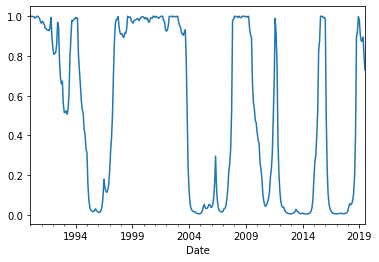

In [14]:
result.smoothed_marginal_probabilities[1].plot()

In [15]:
np.sqrt(result.params['sigma2[0]'])*np.sqrt(12)
#result.params

0.08230593458541065

In [16]:
result.predict()

1990-01-01   -0.000998
1990-02-01   -0.000999
1990-03-01   -0.000993
1990-04-01   -0.000968
1990-05-01   -0.000977
                ...   
2019-03-01    0.000748
2019-04-01    0.000777
2019-05-01    0.000482
2019-06-01    0.001884
2019-07-01    0.002824
Freq: MS, Length: 355, dtype: float64

In [17]:
spx_s = prep.loadStooqData('^spx','1987-12-1','m')

In [18]:
spx = spx_s['1987-12-1':'2020-02-01']
spx = np.log(spx/spx.shift(1)).dropna()

In [19]:
spx.info()

<class 'pandas.core.series.Series'>
Index: 385 entries, 1988-01-31 to 2020-01-31
Series name: Zamkniecie
Non-Null Count  Dtype  
--------------  -----  
385 non-null    float64
dtypes: float64(1)
memory usage: 6.0+ KB


In [20]:
ret_10 = spx_s['1987-12-1':'2022-12-31']

In [21]:
model_spx = sm.tsa.MarkovRegression(spx, k_regimes=3,switching_variance=True)
spx_res = model_spx.fit()

c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
spx_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:             Zamkniecie   No. Observations:                  385
Model:               MarkovRegression   Log Likelihood                 727.267
Date:                Sun, 10 Sep 2023   AIC                          -1430.535
Time:                        22:37:44   BIC                          -1383.096
Sample:                    01-31-1988   HQIC                         -1411.720
                         - 01-31-2020                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.003      4.112      0.000       0.006       0.016
sigma2         0.0006   9.71e-05      5.803      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0515        nan        nan        nan         nan         nan
sigma2         0.0007        nan        nan        nan         nan         nan
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0193      0.010     -1.972      0.049      -0.038      -0.000
sigma2         0.0023      0.000      5.517      0.000       0.002       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9545      0.035     27.531      0.000       0.887       1.022
p[1->0]        0.1608      0.085      1.893      0.058      -0.006       0.327
p[2->0]        0.0003      0.146      0.002      0.998      -0.287       0.287
p[0->1]        0.0003      0.052      0.006      0.995      -0.101       0.102
p[1->1]        0.2918      0.147      1.983      0.047       0.003       0.580
p[2->1]        0.3285      0.167      1.963      0.050       0.001       0.656
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [23]:
spx_res.params

p[0->0]      0.954461
p[1->0]      0.160831
p[2->0]      0.000321
p[0->1]      0.000293
p[1->1]      0.291770
p[2->1]      0.328524
const[0]     0.010511
const[1]     0.051512
const[2]    -0.019300
sigma2[0]    0.000563
sigma2[1]    0.000694
sigma2[2]    0.002346
dtype: float64

In [24]:
p_matrix = np.zeros((3,2))
p_matrix[0] = [0.954461,0.000293]
p_matrix

array([[9.54461e-01, 2.93000e-04],
       [0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00]])

In [25]:
p = np.array([0.96])
#p = np.array([0.95,0.03])
idx = len(p)
print(np.insert(p.cumsum(),idx,1))
np.round(np.insert(p.cumsum(),0,0)+0.001,3)


[0.96 1.  ]


array([0.001, 0.961])

In [26]:
print(spx_res.params['const[0]'] * 12)
print(spx_res.params['const[1]'] * 12)
print(np.sqrt(spx_res.params['sigma2[0]']) * np.sqrt(12))
print(np.sqrt(spx_res.params['sigma2[1]']) * np.sqrt(12))
print(np.sqrt(spx_res.params['sigma2[1]']) * 12)

0.12613529553320155
0.6181474579517914
0.08222890998518396
0.09123861653177688
0.3160598388906626


In [27]:
regimes = spx_res.smoothed_marginal_probabilities[0] > spx_res.smoothed_marginal_probabilities[1]